In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math

Calculate the Green's function in imaginary axis by:
$$G_{nk}(i\omega_j) = -\frac {i\omega_{j} Z_{nk}(i\omega_j)+[(E_{nk}-E_{F})+\kappa_{nk}(i\omega_j)]+\Delta_{nk}(i\omega_j)Z_{nk}(i\omega_j)}{[i\omega_j Z_{nk}(i\omega_j)]^2+[(E_{nk}-E_{F})+\kappa_{nk}(i\omega_j)]^2+[\Delta_{nk}(i\omega_j)Z_{nk}(i\omega_j)]^2}$$

In [27]:
#Read Data from EPW output
data = np.loadtxt('Nb.imag_aniso_012.00')
iw_j = data[:, 0]  #Matsubara Frequency
Z_iw_j = data[:, 2] #Mass Renormalization
Delta_iw_j = data[:, 3]  #Superconducting Gap
E_minus_EF = data[:, 1]  # Energy Difference E - EF
energy_shift_iw_j = data[:, 4]  # Energy Shift

In [28]:
# Ensure that all input arrays have the same length
assert len(iw_j) == len(Z_iw_j) == len(Delta_iw_j) == len(energy_shift_iw_j)

In [29]:
# Compute the Green's function (Imaginary Space)
G_iw_j = - (1j*iw_j* Z_iw_j+E_minus_EF+energy_shift_iw_j+Delta_iw_j*Z_iw_j)/((iw_j* Z_iw_j)**2+(E_minus_EF+energy_shift_iw_j)**2 + (Delta_iw_j*Z_iw_j)**2)

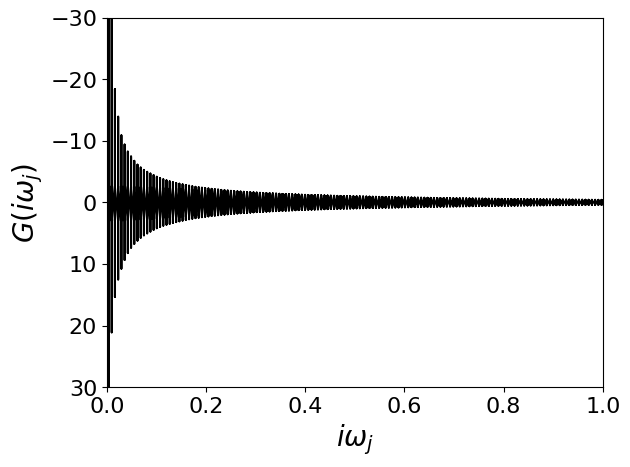

In [30]:
# Plot the Green's function
plt.subplot(1, 1, 1)
plt.plot(iw_j, G_iw_j, color = "black")
plt.xlabel(r'$i\omega_j$', fontsize=20)
plt.ylabel(r'$G(i\omega_j)$', fontsize=20)
plt.ylim(30, -30)
plt.xlim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=16)
#plt.title(r'$Green\'s function$')
#plt.legend()

Calculate the Green's function on real axis by:
$$G_{nk}(\omega) = \frac {\omega Z_{nk}(\omega)+(E_{nk}-E_{F})+\Delta_{nk}(\omega)Z_{nk}(\omega)}{[\omega Z_{nk}(\omega)]^2-(E_{nk}-E_{F})^2-[\Delta_{nk}(\omega)Z_{nk}(\omega)]^2}$$
Calculate the diagonal components by:
$$G_{nk}^{11}(\omega) = \frac {\omega Z_{nk}(\omega)+(E_{nk}-E_{F})}{[\omega Z_{nk}(\omega)]^2-(E_{nk}-E_{F})^2-[\Delta_{nk}(\omega)Z_{nk}(\omega)]^2}$$

In [31]:
#Read data from pade file
data_real = np.loadtxt('Nb.pade_aniso_012.00')
w = data_real[:, 0]   #Frequency Points
Z_w = data_real[:, 2] #Real Part of Mass Renormalization
Z_w_imag = data_real[:, 3] #Imaginary Part of Mass Renormalization
Delta_w = data_real[:, 4]  #Real Part of Superconducting gap
Delta_w_imag = data_real[:, 5] #Imaginary Part of Superconducting gap
E_minus_EF_real = data_real[:, 1]  #Energy difference E - EF
energy_shift_w = data_real[:, 6]  #Real Part of Energy Shift
energy_shift_w_imag = data_real[:, 7]  #Imaginary Part of Energy Shift

In [32]:
#Make functions in real space
Z = Z_w + 1j * Z_w_imag
Delta = Delta_w + 1j* Delta_w_imag
energy_shift = energy_shift_w + 1j*energy_shift_w_imag

In [33]:
#Compute the Green's function and the diagonal componenets
G_w = (w*Z+E_minus_EF_real+Delta*Z)/((w* Z)**2-(E_minus_EF_real)**2-(Delta*Z)**2)
G_w_11 = (w*Z + E_minus_EF_real)/(((w*Z)**2)-(E_minus_EF_real)**2-(Delta*Z)**2)

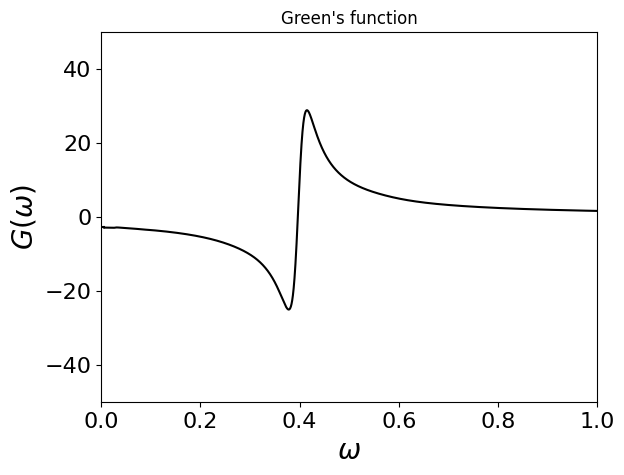

In [34]:
#Plot the Green's function
plt.subplot(1, 1, 1)
plt.plot(w[:28000], G_w[:28000], color = "black") #There are 28000 unique points
plt.xlabel(r'$\omega$', fontsize=20)
plt.ylabel(r'$G(\omega)$', fontsize=20)
plt.title('Green\'s function')
plt.ylim(-50, 50)
plt.xlim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=16)

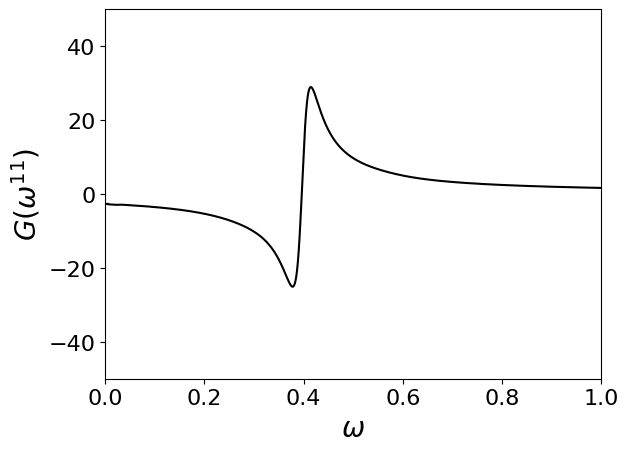

In [35]:
#Plot the diagonal componenets of the Green's function
plt.subplot(1, 1, 1)
plt.plot(w[:28000], G_w_11[:28000] , color = 'black')
plt.xlabel(r'$\omega$', fontsize=20)
plt.ylabel(r'$G(\omega^{11})$', fontsize=20)
#plt.title('Green\'s function')
plt.ylim(-50,50)
plt.xlim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=16)
#plt.legend()

Calculate the spectral function:
$$ A(\omega) = \frac{1}{\pi}ImG^{11}(\omega)$$

In [36]:
#Calculate the spectral function A_w 
A_w_new = (-1 / np.pi )* np.imag(G_w_11)

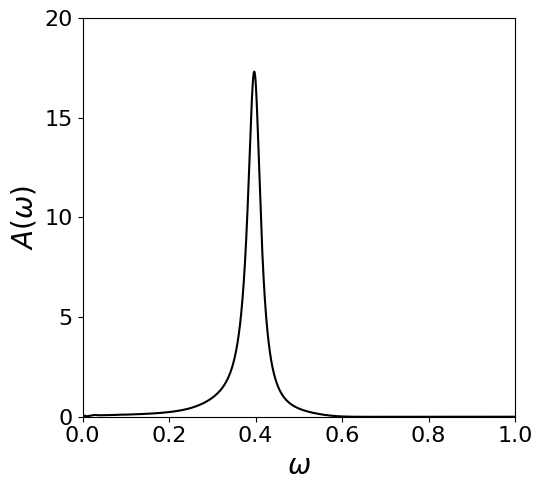

In [37]:
# Plot the spectral function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(w[:28000], A_w_new[:28000], label='A(ω)', color = 'black')
plt.xlabel(r'$\omega$', fontsize=20)
plt.ylabel(r'$A(\omega)$', fontsize=20)
plt.ylim(0, 20)
plt.xlim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=16)

# Set the spacing between ticks
x_major_locator = MultipleLocator(0.2) 
y_major_locator = MultipleLocator(5) 

ax = plt.gca()  
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.tight_layout()
plt.show()

In [38]:
#Calculate the quasiparticle density of state
dos = 8.0707186137E-01
density_of_quasiparticles= np.real(w/np.sqrt(w**2 - Delta**2))/(dos)

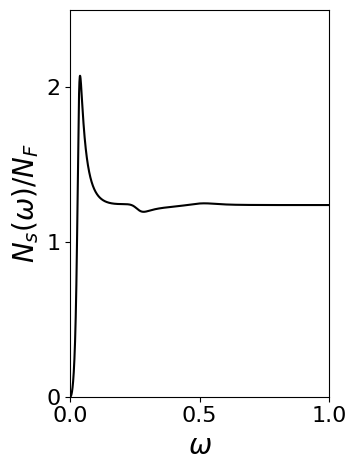

In [46]:
# Plot the spectral function
plt.subplot(1, 2, 2)
plt.plot(w[:28000]*10, density_of_quasiparticles[:28000], color = "black")
plt.xlabel(r'$\omega$', fontsize=20)
plt.ylabel(r'$N_s(\omega)/N_F$', fontsize=20)
plt.ylim(0, 2.5)
plt.xlim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=16)

# Set the spacing between ticks
x_major_locator = MultipleLocator(0.5)  
y_major_locator = MultipleLocator(1)  

ax = plt.gca()  
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.tight_layout()
plt.show()